<a href="https://colab.research.google.com/github/AtharvKulkarni2110/ask/blob/main/PID_controller_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PID CONTROLLER
Your task is to design and implement a PID controller using Python for a temperature control system. The system consists of a heater that can increase the temperature of a room and a temperature sensor that measures the room temperature. The goal is to maintain the room temperature at a setpoint value by controlling the heater's power output. The dynamics of the temperature control system can be described by the following equations:

Heat Transfer Dynamics:
   The rate of change of the room temperature T_r over time is given by:
   d(T_r)/dt = 1/C ( P_in - P_out)
   where:
   - C is the heat capacity of the room,
   - P_in is the power input from the heater,
   - P_out is the heat loss to the environment.

Let
C = 100
P_out = 10 W
Setpoint value = 25°C

GIVEN POINTS

1.   PLANT- HEATER
2.   ERROR = setpoint temp- current temp



approach--
1. WEIGHTS OF EACH COMPONENT i.e
   Kp- for proportional part
   Ki- for integral part
   Kd- for derivative part
2. parts in which your P_out v/s time graph is divided
   i.e. for integral and differential part you need small dt...
   so number of iterations for integration or diff. = time for which you want to plot graph/dt
3. see for each iteration of time frame dt your controller updates value of p_in( to minimize error) by adding value of P,I,D

  P we can simply get as kp * error

  I is integration of error till that time frame i.e adding up small rectangle area error*dt each time to integral term.and then ki * I

  D is kd *diffrential term which is taken as change of error w.r.t to time
4. To simulate our model for required time
 we collect current temperatures of room for each time frame by calling pid_controller function for each iteration
5. PARAMETERS- these are set such that error is minimum and temperature of room doesn't vary much keeping low value of ki decreases overshooting also in pd value of kp is set higher





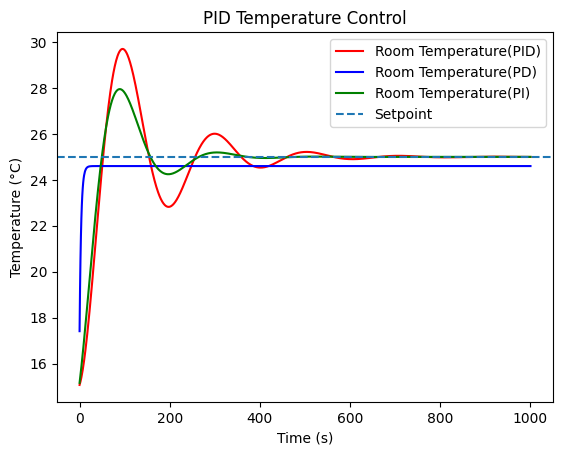

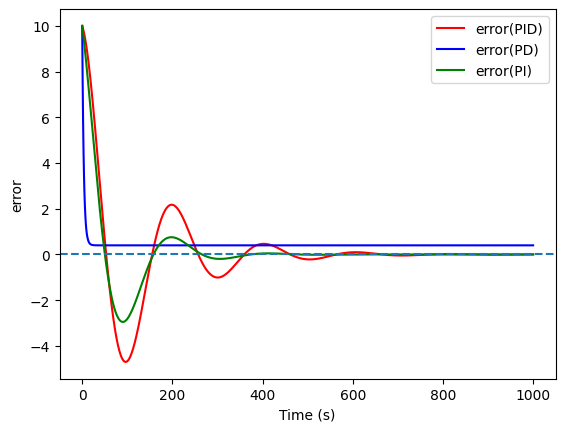

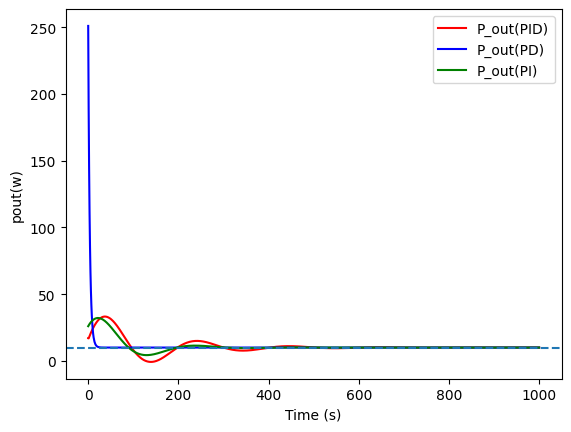

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# PID controller function
def update(setpoint, current_value, dt, pid_para, pid_state):
    error = setpoint - current_value
    pid_state['integral'] += error * dt
    derivative = (error - pid_state['prev_error']) / dt
    pid_state['prev_error'] = error

    P = pid_para['Kp'] * error
    I = pid_para['Ki'] * pid_state['integral']
    D = pid_para['Kd'] * derivative

    return P + I + D,error

# System parameters
C = 100  # Heat capacity of the room
P_out = 10  # Constant heat loss to the environment
setpoint = 25  # Desired room temperature in °C

# Simulation function
def simulate(pid_para, initial_temp, C, P_out, dt, total_time):
    num_steps = int(total_time / dt)
    temps = np.zeros(num_steps)
    errors=np.zeros(num_steps)
    pout=np.zeros(num_steps)
    times = np.linspace(0, total_time, num_steps)

    current_temp = initial_temp
    pid_state = {'integral': 0, 'prev_error': 0}  # PID state

    for i in range(num_steps):
        P_in,errors[i] = update(setpoint, current_temp, dt, pid_para, pid_state)
        pout[i]=P_in
        dTdt = ((P_in - P_out) / C)
        current_temp += dTdt*dt
        temps[i] = current_temp

    return times, temps,errors,pout

initial_temp = 15  # Initial room temperature in °C
dt = 1  # Time step in seconds
total_time = 1000  # Total simulation time in seconds

# PID controller parameters
pid_para = {
    'Kp': 1.5,
    'Ki': 0.1,
    'Kd':0.10
}

# Run simulation
times, temps,errors,pout = simulate(pid_para, initial_temp, C, P_out, dt, total_time)
plt.plot(times, temps, label='Room Temperature(PID)',color='red')
pid_para = {
    'Kp': 25,
    'Ki': 0.0,
    'Kd':0.10
}
times, temps,errors,pout = simulate(pid_para, initial_temp, C, P_out, dt, total_time)
plt.plot(times, temps, label='Room Temperature(PD)',color='blue')
pid_para = {
    'Kp': 2.5,
    'Ki': 0.1,
    'Kd':0.0
}
times, temps,errors,pout = simulate(pid_para, initial_temp, C, P_out, dt, total_time)
plt.plot(times, temps, label='Room Temperature(PI)',color='green')
plt.axhline(y=setpoint, linestyle='--', label='Setpoint')
plt.xlabel('Time (s)')
plt.ylabel('Temperature (°C)')
plt.title('PID Temperature Control')
plt.legend()
plt.show()


# error v/s time
pid_para = {
    'Kp': 1.5,
    'Ki': 0.1,
    'Kd':0.10
}
times, temps,errors,pout = simulate(pid_para, initial_temp, C, P_out, dt, total_time)
plt.plot(times,errors,label='error(PID)',color='red')
pid_para = {
    'Kp': 25.0,
    'Ki': 0.0,
    'Kd':0.10
}
times, temps,errors,pout = simulate(pid_para, initial_temp, C, P_out, dt, total_time)
plt.plot(times,errors,label='error(PD)',color='blue')
pid_para = {
    'Kp': 2.5,
    'Ki': 0.1,
    'Kd':0.0
}
times, temps,errors,pout = simulate(pid_para, initial_temp, C, P_out, dt, total_time)
plt.plot(times,errors,label='error(PI)',color='green')
plt.axhline(y=0, linestyle='--')
plt.xlabel('Time (s)')
plt.ylabel('error')
plt.legend()
plt.show()



pid_para = {
    'Kp': 1.5,
    'Ki': 0.1,
    'Kd':0.10
}
times, temps,errors,pout = simulate(pid_para, initial_temp, C, P_out, dt, total_time)
plt.plot(times,pout,label='P_out(PID)',color='red')
pid_para = {
    'Kp': 25.0,
    'Ki': 0.0,
    'Kd':0.10
}
times, temps,errors,pout = simulate(pid_para, initial_temp, C, P_out, dt, total_time)
plt.plot(times,pout,label='P_out(PD)',color='blue')
pid_para = {
    'Kp': 2.5,
    'Ki': 0.1,
    'Kd':0.0
}
times, temps,errors,pout = simulate(pid_para, initial_temp, C, P_out, dt, total_time)
plt.plot(times,pout,label='P_out(PI)',color='green')
plt.axhline(y=10, linestyle='--')
plt.xlabel('Time (s)')
plt.ylabel('pout(w)')
plt.legend()
plt.show()

